In [182]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import lfilter, freqz
from scipy import fft
from scipy.stats import norm

In [183]:
bits = 12

In [205]:
xs = np.linspace(0,2**bits-1,num=2**bits, dtype=np.int16)
# norm_ppf = np.array(((2**8)-1)*norm(0.5, 0.1).ppf(xs), dtype=np.int16)
norm_ppf = norm(0, 0.01).ppf(xs/(((2.0)**bits)))
print(xs)


[   0    1    2 ... 4093 4094 4095]


In [206]:
# print(xs/(((2.0)**8)))
# print(norm_ppf)
norm_ppf_corrected = np.copy(norm_ppf)
norm_ppf_corrected[0] = norm_ppf_corrected[1] - (norm_ppf_corrected[2]-norm_ppf_corrected[1])

norm_ppf_corrected = np.array((2**bits-1)*norm_ppf_corrected, dtype=np.int16)
print(norm_ppf_corrected)
print(len(norm_ppf_corrected))

[-150 -142 -135 ...  130  135  142]
4096


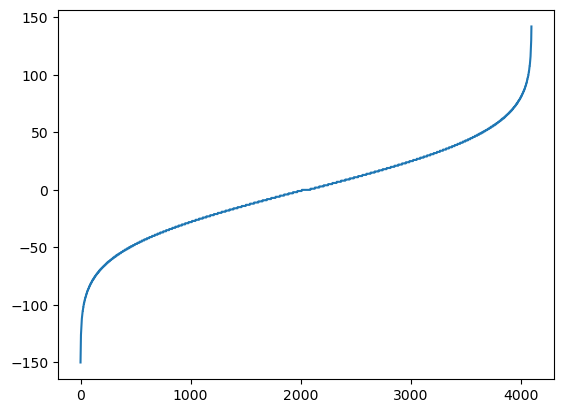

In [207]:
plt.plot(xs, norm_ppf_corrected)

In [219]:
for i in range(len(xs)):
    print("12'b{:012b}, ".format((norm_ppf_corrected[i])&0xFFF), end="")

12'b111101101010, 12'b111101110010, 12'b111101111001, 12'b111101111110, 12'b111110000010, 12'b111110000100, 12'b111110000111, 12'b111110001001, 12'b111110001010, 12'b111110001100, 12'b111110001101, 12'b111110001110, 12'b111110010000, 12'b111110010001, 12'b111110010010, 12'b111110010011, 12'b111110010100, 12'b111110010100, 12'b111110010101, 12'b111110010110, 12'b111110010111, 12'b111110010111, 12'b111110011000, 12'b111110011001, 12'b111110011001, 12'b111110011010, 12'b111110011010, 12'b111110011011, 12'b111110011100, 12'b111110011100, 12'b111110011101, 12'b111110011101, 12'b111110011110, 12'b111110011110, 12'b111110011110, 12'b111110011111, 12'b111110011111, 12'b111110100000, 12'b111110100000, 12'b111110100000, 12'b111110100001, 12'b111110100001, 12'b111110100010, 12'b111110100010, 12'b111110100010, 12'b111110100011, 12'b111110100011, 12'b111110100011, 12'b111110100100, 12'b111110100100, 12'b111110100100, 12'b111110100101, 12'b111110100101, 12'b111110100101, 12'b111110100110, 12'b111110

In [216]:
for i in range(len(xs)):
    print("{:12b}, ".format((norm_ppf_corrected[i])&0xFFF), end="")

111101101010, 111101110010, 111101111001, 111101111110, 111110000010, 111110000100, 111110000111, 111110001001, 111110001010, 111110001100, 111110001101, 111110001110, 111110010000, 111110010001, 111110010010, 111110010011, 111110010100, 111110010100, 111110010101, 111110010110, 111110010111, 111110010111, 111110011000, 111110011001, 111110011001, 111110011010, 111110011010, 111110011011, 111110011100, 111110011100, 111110011101, 111110011101, 111110011110, 111110011110, 111110011110, 111110011111, 111110011111, 111110100000, 111110100000, 111110100000, 111110100001, 111110100001, 111110100010, 111110100010, 111110100010, 111110100011, 111110100011, 111110100011, 111110100100, 111110100100, 111110100100, 111110100101, 111110100101, 111110100101, 111110100110, 111110100110, 111110100110, 111110100110, 111110100111, 111110100111, 111110100111, 111110101000, 111110101000, 111110101000, 111110101000, 111110101001, 111110101001, 111110101001, 111110101001, 111110101010, 111110101010, 111110

In [188]:
print("{:012b}".format(-6 & 0xFFFF))
print("{:012b}".format(-6))

1111111111111010
-00000000110


In [210]:
len(xs)

4096

In [190]:
np.linspace(0,2**2-1,num=2**2, dtype=np.int16)

array([0, 1, 2, 3], dtype=int16)

In [217]:
a = [111101101010, 111101110010, 111101111001, 111101111110, 111110000010, 111110000100, 111110000111, 111110001001, 111110001010, 111110001100, 111110001101, 111110001110, 111110010000, 111110010001, 111110010010, 111110010011, 111110010100, 111110010100, 111110010101, 111110010110, 111110010111, 111110010111, 111110011000, 111110011001, 111110011001, 111110011010, 111110011010, 111110011011, 111110011100, 111110011100, 111110011101, 111110011101, 111110011110, 111110011110, 111110011110, 111110011111, 111110011111, 111110100000, 111110100000, 111110100000, 111110100001, 111110100001, 111110100010, 111110100010, 111110100010, 111110100011, 111110100011, 111110100011, 111110100100, 111110100100, 111110100100, 111110100101, 111110100101, 111110100101, 111110100110, 111110100110, 111110100110, 111110100110, 111110100111, 111110100111, 111110100111, 111110101000, 111110101000, 111110101000, 111110101000, 111110101001, 111110101001, 111110101001, 111110101001, 111110101010, 111110101010, 111110101010, 111110101010, 111110101010, 111110101011, 111110101011, 111110101011, 111110101011, 111110101100, 111110101100, 111110101100, 111110101100, 111110101100, 111110101101, 111110101101, 111110101101, 111110101101, 111110101101, 111110101110, 111110101110, 111110101110, 111110101110, 111110101110, 111110101111, 111110101111, 111110101111, 111110101111, 111110101111, 111110101111, 111110110000, 111110110000, 111110110000, 111110110000, 111110110000, 111110110001, 111110110001, 111110110001, 111110110001, 111110110001, 111110110001, 111110110010, 111110110010, 111110110010, 111110110010, 111110110010, 111110110010, 111110110010, 111110110011, 111110110011, 111110110011, 111110110011, 111110110011, 111110110011, 111110110011, 111110110100, 111110110100, 111110110100, 111110110100, 111110110100, 111110110100, 111110110101, 111110110101, 111110110101, 111110110101, 111110110101, 111110110101, 111110110101, 111110110101, 111110110110, 111110110110, 111110110110, 111110110110, 111110110110, 111110110110, 111110110110, 111110110111, 111110110111, 111110110111, 111110110111, 111110110111, 111110110111, 111110110111, 111110110111, 111110111000, 111110111000, 111110111000, 111110111000, 111110111000, 111110111000, 111110111000, 111110111000, 111110111000, 111110111001, 111110111001, 111110111001, 111110111001, 111110111001, 111110111001, 111110111001, 111110111001, 111110111010, 111110111010, 111110111010, 111110111010, 111110111010, 111110111010, 111110111010, 111110111010, 111110111010, 111110111011, 111110111011, 111110111011, 111110111011, 111110111011, 111110111011, 111110111011, 111110111011, 111110111011, 111110111011, 111110111100, 111110111100, 111110111100, 111110111100, 111110111100, 111110111100, 111110111100, 111110111100, 111110111100, 111110111100, 111110111101, 111110111101, 111110111101, 111110111101, 111110111101, 111110111101, 111110111101, 111110111101, 111110111101, 111110111101, 111110111110, 111110111110, 111110111110, 111110111110, 111110111110, 111110111110, 111110111110, 111110111110, 111110111110, 111110111110, 111110111110, 111110111111, 111110111111, 111110111111, 111110111111, 111110111111, 111110111111, 111110111111, 111110111111, 111110111111, 111110111111, 111110111111, 111111000000, 111111000000, 111111000000, 111111000000, 111111000000, 111111000000, 111111000000, 111111000000, 111111000000, 111111000000, 111111000000, 111111000001, 111111000001, 111111000001, 111111000001, 111111000001, 111111000001, 111111000001, 111111000001, 111111000001, 111111000001, 111111000001, 111111000001, 111111000010, 111111000010, 111111000010, 111111000010, 111111000010, 111111000010, 111111000010, 111111000010, 111111000010, 111111000010, 111111000010, 111111000010, 111111000010, 111111000011, 111111000011, 111111000011, 111111000011, 111111000011, 111111000011, 111111000011, 111111000011, 111111000011, 111111000011, 111111000011, 111111000011, 111111000011, 111111000100, 111111000100, 111111000100, 111111000100, 111111000100, 111111000100, 111111000100, 111111000100, 111111000100, 111111000100, 111111000100, 111111000100, 111111000100, 111111000101, 111111000101, 111111000101, 111111000101, 111111000101, 111111000101, 111111000101, 111111000101, 111111000101, 111111000101, 111111000101, 111111000101, 111111000101, 111111000101, 111111000110, 111111000110, 111111000110, 111111000110, 111111000110, 111111000110, 111111000110, 111111000110, 111111000110, 111111000110, 111111000110, 111111000110, 111111000110, 111111000110, 111111000111, 111111000111, 111111000111, 111111000111, 111111000111, 111111000111, 111111000111, 111111000111, 111111000111, 111111000111, 111111000111, 111111000111, 111111000111, 111111000111, 111111000111, 111111001000, 111111001000, 111111001000, 111111001000, 111111001000, 111111001000, 111111001000, 111111001000, 111111001000, 111111001000, 111111001000, 111111001000, 111111001000, 111111001000, 111111001000, 111111001000, 111111001001, 111111001001, 111111001001, 111111001001, 111111001001, 111111001001, 111111001001, 111111001001, 111111001001, 111111001001, 111111001001, 111111001001, 111111001001, 111111001001, 111111001001, 111111001001, 111111001010, 111111001010, 111111001010, 111111001010, 111111001010, 111111001010, 111111001010, 111111001010, 111111001010, 111111001010, 111111001010, 111111001010, 111111001010, 111111001010, 111111001010, 111111001010, 111111001011, 111111001011, 111111001011, 111111001011, 111111001011, 111111001011, 111111001011, 111111001011, 111111001011, 111111001011, 111111001011, 111111001011, 111111001011, 111111001011, 111111001011, 111111001011, 111111001011, 111111001100, 111111001100, 111111001100, 111111001100, 111111001100, 111111001100, 111111001100, 111111001100, 111111001100, 111111001100, 111111001100, 111111001100, 111111001100, 111111001100, 111111001100, 111111001100, 111111001100, 111111001100, 111111001101, 111111001101, 111111001101, 111111001101, 111111001101, 111111001101, 111111001101, 111111001101, 111111001101, 111111001101, 111111001101, 111111001101, 111111001101, 111111001101, 111111001101, 111111001101, 111111001101, 111111001101, 111111001110, 111111001110, 111111001110, 111111001110, 111111001110, 111111001110, 111111001110, 111111001110, 111111001110, 111111001110, 111111001110, 111111001110, 111111001110, 111111001110, 111111001110, 111111001110, 111111001110, 111111001110, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111001111, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010000, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010001, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010010, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010011, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010100, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010101, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010110, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111010111, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011000, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011001, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011010, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011011, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011100, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011101, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011110, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111011111, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100000, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100001, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100010, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100011, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100100, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100101, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100110, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111100111, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101000, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101001, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101010, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101011, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101100, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101101, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101110, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111101111, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110000, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110001, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110010, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110011, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110100, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110101, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110110, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111110111, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111000, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111001, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111010, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111011, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111100, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111101, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111110, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111, 111111111111,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            0,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,            1,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           10,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,           11,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          100,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          101,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          110,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,          111,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1000,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1001,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1010,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1011,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1100,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1101,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1110,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,         1111,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10000,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10001,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10010,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10011,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10100,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10101,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10110,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        10111,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11000,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11001,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11010,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11011,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11100,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11101,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11110,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,        11111,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100000,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100001,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100010,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100011,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100100,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100101,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100110,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       100111,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101000,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101001,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101010,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101011,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101100,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101101,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101110,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       101111,       110000,       110000,       110000,       110000,       110000,       110000,       110000,       110000,       110000,       110000,       110000,       110000,       110000,       110000,       110000,       110000,       110000,       110000,       110000,       110001,       110001,       110001,       110001,       110001,       110001,       110001,       110001,       110001,       110001,       110001,       110001,       110001,       110001,       110001,       110001,       110001,       110001,       110001,       110001,       110010,       110010,       110010,       110010,       110010,       110010,       110010,       110010,       110010,       110010,       110010,       110010,       110010,       110010,       110010,       110010,       110010,       110010,       110011,       110011,       110011,       110011,       110011,       110011,       110011,       110011,       110011,       110011,       110011,       110011,       110011,       110011,       110011,       110011,       110011,       110011,       110100,       110100,       110100,       110100,       110100,       110100,       110100,       110100,       110100,       110100,       110100,       110100,       110100,       110100,       110100,       110100,       110100,       110100,       110101,       110101,       110101,       110101,       110101,       110101,       110101,       110101,       110101,       110101,       110101,       110101,       110101,       110101,       110101,       110101,       110101,       110110,       110110,       110110,       110110,       110110,       110110,       110110,       110110,       110110,       110110,       110110,       110110,       110110,       110110,       110110,       110110,       110111,       110111,       110111,       110111,       110111,       110111,       110111,       110111,       110111,       110111,       110111,       110111,       110111,       110111,       110111,       110111,       111000,       111000,       111000,       111000,       111000,       111000,       111000,       111000,       111000,       111000,       111000,       111000,       111000,       111000,       111000,       111000,       111001,       111001,       111001,       111001,       111001,       111001,       111001,       111001,       111001,       111001,       111001,       111001,       111001,       111001,       111001,       111010,       111010,       111010,       111010,       111010,       111010,       111010,       111010,       111010,       111010,       111010,       111010,       111010,       111010,       111011,       111011,       111011,       111011,       111011,       111011,       111011,       111011,       111011,       111011,       111011,       111011,       111011,       111011,       111100,       111100,       111100,       111100,       111100,       111100,       111100,       111100,       111100,       111100,       111100,       111100,       111100,       111101,       111101,       111101,       111101,       111101,       111101,       111101,       111101,       111101,       111101,       111101,       111101,       111101,       111110,       111110,       111110,       111110,       111110,       111110,       111110,       111110,       111110,       111110,       111110,       111110,       111110,       111111,       111111,       111111,       111111,       111111,       111111,       111111,       111111,       111111,       111111,       111111,       111111,      1000000,      1000000,      1000000,      1000000,      1000000,      1000000,      1000000,      1000000,      1000000,      1000000,      1000000,      1000001,      1000001,      1000001,      1000001,      1000001,      1000001,      1000001,      1000001,      1000001,      1000001,      1000001,      1000010,      1000010,      1000010,      1000010,      1000010,      1000010,      1000010,      1000010,      1000010,      1000010,      1000010,      1000011,      1000011,      1000011,      1000011,      1000011,      1000011,      1000011,      1000011,      1000011,      1000011,      1000100,      1000100,      1000100,      1000100,      1000100,      1000100,      1000100,      1000100,      1000100,      1000100,      1000101,      1000101,      1000101,      1000101,      1000101,      1000101,      1000101,      1000101,      1000101,      1000101,      1000110,      1000110,      1000110,      1000110,      1000110,      1000110,      1000110,      1000110,      1000110,      1000111,      1000111,      1000111,      1000111,      1000111,      1000111,      1000111,      1000111,      1001000,      1001000,      1001000,      1001000,      1001000,      1001000,      1001000,      1001000,      1001000,      1001001,      1001001,      1001001,      1001001,      1001001,      1001001,      1001001,      1001001,      1001010,      1001010,      1001010,      1001010,      1001010,      1001010,      1001010,      1001011,      1001011,      1001011,      1001011,      1001011,      1001011,      1001011,      1001011,      1001100,      1001100,      1001100,      1001100,      1001100,      1001100,      1001101,      1001101,      1001101,      1001101,      1001101,      1001101,      1001101,      1001110,      1001110,      1001110,      1001110,      1001110,      1001110,      1001110,      1001111,      1001111,      1001111,      1001111,      1001111,      1001111,      1010000,      1010000,      1010000,      1010000,      1010000,      1010001,      1010001,      1010001,      1010001,      1010001,      1010001,      1010010,      1010010,      1010010,      1010010,      1010010,      1010011,      1010011,      1010011,      1010011,      1010011,      1010100,      1010100,      1010100,      1010100,      1010100,      1010101,      1010101,      1010101,      1010101,      1010110,      1010110,      1010110,      1010110,      1010110,      1010111,      1010111,      1010111,      1010111,      1011000,      1011000,      1011000,      1011000,      1011001,      1011001,      1011001,      1011010,      1011010,      1011010,      1011010,      1011011,      1011011,      1011011,      1011100,      1011100,      1011100,      1011101,      1011101,      1011101,      1011110,      1011110,      1011110,      1011111,      1011111,      1100000,      1100000,      1100000,      1100001,      1100001,      1100010,      1100010,      1100010,      1100011,      1100011,      1100100,      1100100,      1100101,      1100110,      1100110,      1100111,      1100111,      1101000,      1101001,      1101001,      1101010,      1101011,      1101100,      1101100,      1101101,      1101110,      1101111,      1110000,      1110010,      1110011,      1110100,      1110110,      1110111,      1111001,      1111100,      1111110,     10000010,     10000111,     10001110]

In [218]:
len(a)

4096